# **Welcome to Customer Churn Analysis**

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("dark_background")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, recall_score, roc_auc_score

In [2]:
# Import the required dataset
df_churn = pd.read_csv(r'D:\Intellipaat\Datasets\Customer_churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [3]:
# Data information
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Check for the null values in dataframe
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Check for the duplicated in dataframe
df_churn.duplicated().sum()

0

In [6]:
# Replace the blanks with 0 in 'TotalCharges' column
df_churn['TotalCharges'].replace(" ", 0, inplace=True)

In [7]:
# Convert the dtype of 'TotalCharges' column to float
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype(float)
df_churn['TotalCharges'].dtype

dtype('float64')

In [8]:
# Drop the unwanted columns
df_churn.drop(columns='customerID', axis=1, inplace=True)

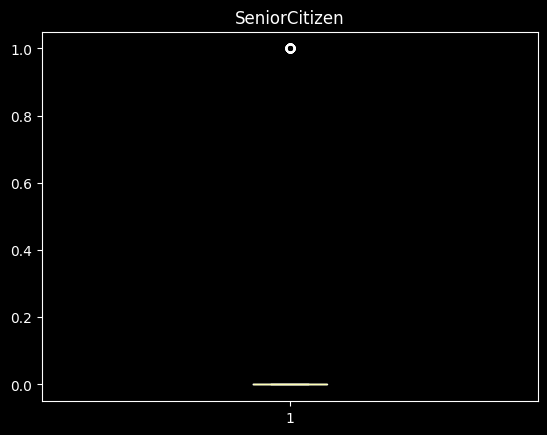

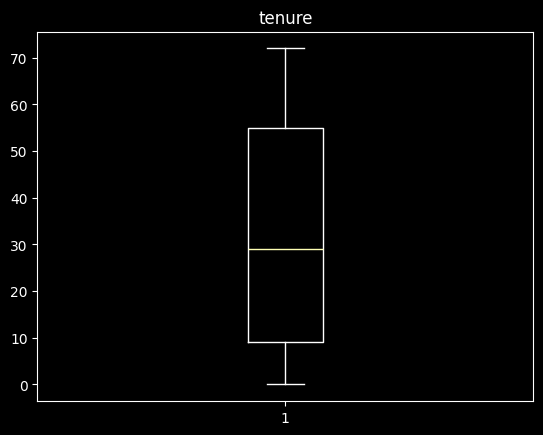

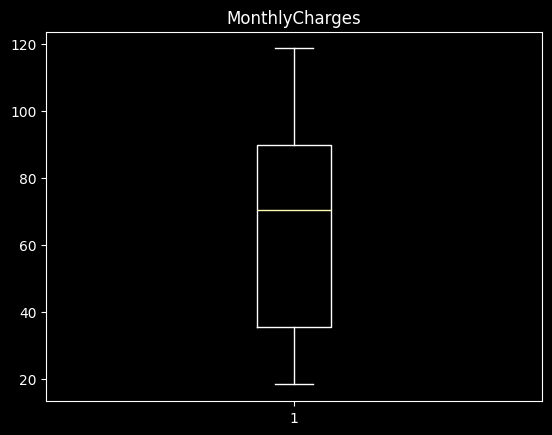

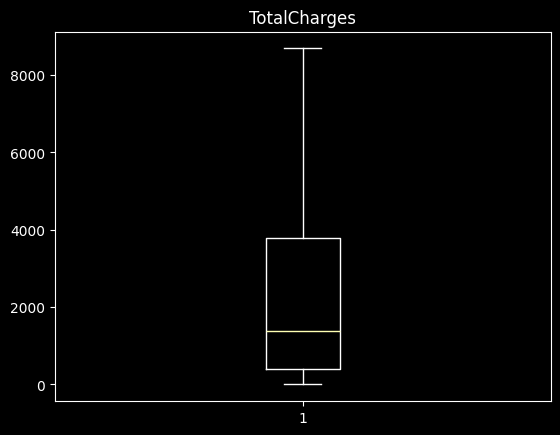

In [9]:
# Check for the outliers in dataframe
for col in df_churn.columns:
    if df_churn[col].dtype != 'object':
        plt.boxplot(df_churn[col])
        plt.title(col)
        plt.show()

In [10]:
# Value counts of 'SeniorCitizen' Column
df_churn['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Inference :-
- In 'SeniorCitizen' column, more than 80% of customers are young, that's why it is showing senior citizen as an outliers.
- But it's actually not an outlier

In [11]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Label Encoding
encoder = LabelEncoder()

for col in df_churn.columns :
    if df_churn[col].dtype == "object" :
        df_churn[col] = encoder.fit_transform(df_churn[col])

df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


## Visualization

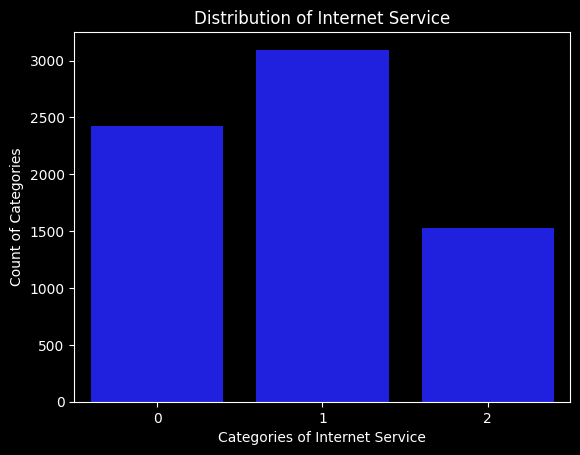

In [13]:
#   Build a bar-plot for the ’InternetService’ column:
#       a. Set x-axis label to ‘Categories of Internet Service’
#       b. Set y-axis label to ‘Count of Categories’
#       c. Set the title of plot to be ‘Distribution of Internet Service’
#       d. Set the color of the bars to be ‘orange
internet = df_churn['InternetService'].value_counts()

plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
sns.barplot(x=internet.index, y=internet.values, color='blue')
plt.show()

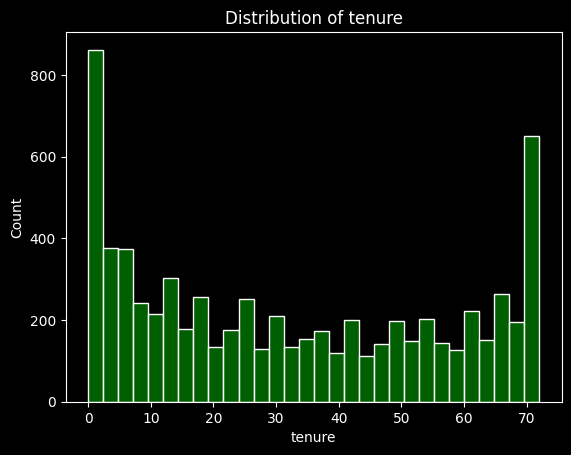

In [14]:
#   Build a histogram for the ‘tenure’ column:
#       a. Set the number of bins to be 30
#       b. Set the color of the bins to be ‘green’
#       c. Assign the title ‘Distribution of tenure'

sns.histplot(df_churn['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

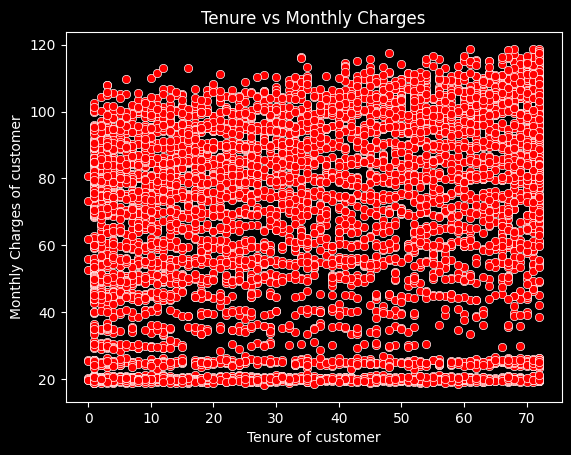

In [15]:
#   Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. 
#   Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
#       a. Assign the points a color of ‘brown’
#       b. Set the x-axis label to ‘Tenure of customer’
#       c. Set the y-axis label to ‘Monthly Charges of customer’
#       d. Set the title to ‘Tenure vs Monthly Charges’

sns.scatterplot(x=df_churn['tenure'], y=df_churn['MonthlyCharges'], color = 'red')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

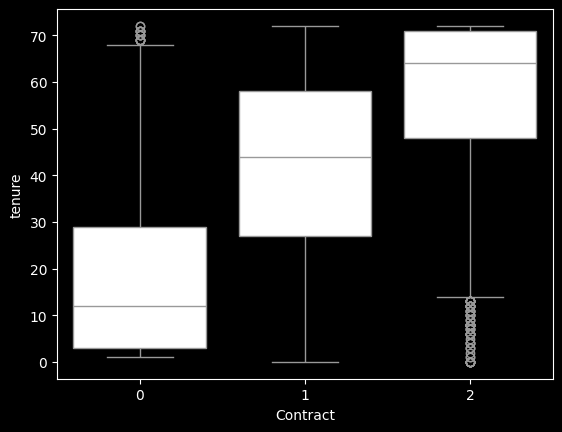

In [16]:
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
# f. ‘Contract’ on the x-axis.

sns.boxplot(x=df_churn['Contract'], y=df_churn['tenure'], color='white')
plt.show()

In [17]:
# Initialize independent & dependent variable
X = df_churn.drop(columns=['Churn'])
y = df_churn['Churn']

In [18]:
# Standardize the input data
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df_churn.columns.difference(['Churn']))

In [19]:
# Split the data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [20]:
# Display the shape of training & testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


In [21]:
# Create a random forest classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)         # train the model

RandomForestClassifier()

In [22]:
# Get the prediction on testing data as well as training data
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [23]:
# Check the accuracy of model for both y_test & y_train pred for checking overfitting
acc_testing = accuracy_score(y_test, y_pred)
acc_training = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on testing data :- {round(acc_testing, 3)}")
print(f"Accuracy on training data :- {round(acc_training, 3)}")

Accuracy on testing data :- 0.782
Accuracy on training data :- 0.998


Inference :- Here, we see that the model is overfitting

In [24]:
# Check the roc_auc_score due to imbalance in data
roc_auc_score(y_test, y_pred)

0.6886137590741171

In [25]:
# See the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Inference :- The score of metrics like precision, recall, f1score is very low. Means the model's predictions are not quite good.

## Feature selection

In [26]:
# Extract the feature importance
importance = model.feature_importances_                                              # 0-1 values of features/columns according to their importance,
features = X.columns                                                                 # higher the value, higher the importance
df_impfeat = pd.DataFrame({'Features' : features, 'Importance' : importance})        # DF of feature name and their impotance

In [27]:
# Rank the features by importance
df_impfeat.sort_values(by='Importance', ascending=False, inplace=True)

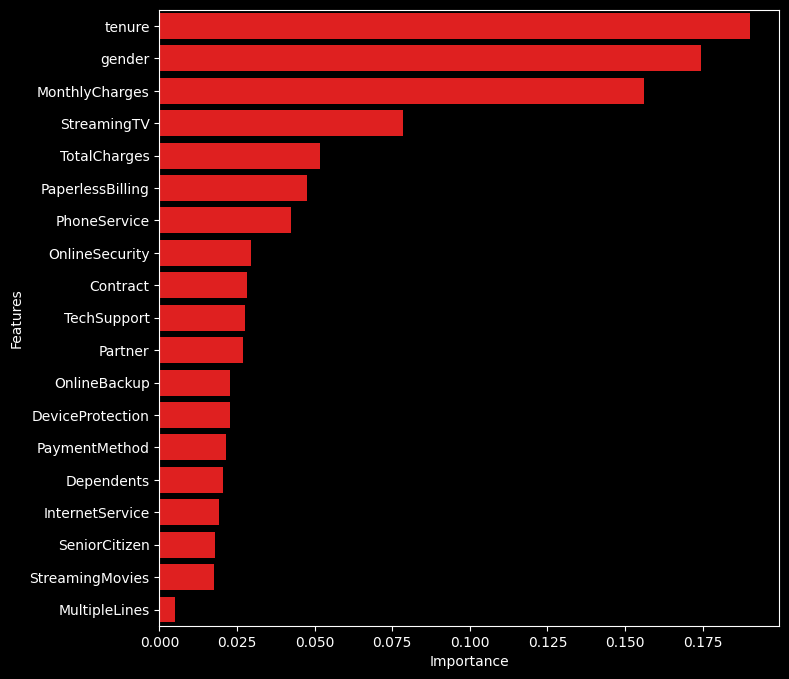

In [28]:
# Plot the importance of every column
plt.figure(figsize=(8, 8))
sns.barplot(data=df_impfeat, x='Importance', y='Features', orient='h', color='red')
plt.show()

In [29]:
# Select 10 best features & create training data 
top_features = df_impfeat['Features'][ : 10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

## Hyper parameter tuning

In [30]:
# Create the parameter for grid search
param_grid = {'n_estimators' : [25, 50, 75, 100], 
              'max_features' : ['sqrt', 'log2', None], 
              'max_depth' : [3, 6, 9], 
              'max_leaf_nodes' : [3, 6, 9]}

In [31]:
# Grid search to find best parameter for model
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train_selected, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [32]:
# Create new model with best parameter got by GridSearchCV
model_grid = RandomForestClassifier(n_estimators=50, max_depth=6, max_features='log2', max_leaf_nodes=9, random_state=42)

In [33]:
# Train the model
model_grid.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50, random_state=42)

In [34]:
# Get the predictions from the model
y_pred_grid = model_grid.predict(X_test_selected)
y_train_pred_grid = model_grid.predict(X_train_selected)

In [35]:
# Check the accuracy of model_grid
acc_grid_testing = accuracy_score(y_test, y_pred_grid)
acc_grid_training = accuracy_score(y_train, y_train_pred_grid)
print("Accuracy of hyper-parameter model\n")
print('Accuracy on Testing data :-', round(acc_grid_testing, 3))
print('Accuracy on Training data :-', round(acc_grid_training, 3))

Accuracy of hyper-parameter model

Accuracy on Testing data :- 0.796
Accuracy on Training data :- 0.8


Inference :- Here, accuracy increased by model build with best parameters, and also there's no more overfitting

In [36]:
# Check the roc auc score of grid model
roc_auc_score(y_test, y_pred_grid)

0.6769304296158516

In [37]:
# Check the classification report
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.69      0.42      0.52       374

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



END

---